<a href="https://colab.research.google.com/github/pbitalo/Regressao-Linear/blob/master/RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Realizando Previsão com Regressão Linear

### Objetivo

Não terei como foco adentrar estatísticamente sobre os conceitos e definições da regressão linear, no entanto será inevitável não falar um pouco sobre o tema. A idéia aqui é apresentar um algoritmo funcional de como realizar uma previsão através desse método estatístico.


Palavras-chaves: cienciadedados , python , algoritmo , programação , regressaolinear, regressaosimples , regressaomultipla, previsao

Público Alvo: Estudantes e profissionais da área de ciência de dados e afins.

#### Bibliotecas

In [0]:
import matplotlib.pyplot as plt
import pandas as pd, seaborn as sb, numpy as np
import statsmodels.api as sm
import statsmodels.regression.linear_model as sm
from sklearn.linear_model import LinearRegression    
from sklearn.model_selection import train_test_split

### Introdução

Este método tem como objetivo final realizar previsões de possíveis valores dado a relação/correlação entre variáveis preditoras e variável dependente. Em ciência de dados, esse método é muito utilizado para prever anomalias/registros incomuns.

A seguir, veremos uma imagem retirada do [site](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear]) para ilustrar e demonstrar uma reta de regressão.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/LinearRegression.svg">

Segundo Ron LARSON e Betsy FARBER, a reta de regressão é também conhecida como reta de melhor ajuste, ou seja, esta reta é posta na posição em que a soma dos quadrados dos resíduos é um mínimo. A seguir, veremos uma imagem que facilitará a compreensão desta definição.

<img src="https://github.com/pbitalo/Regressao-Linear/blob/master/img/ImgSomaQuadradosResiduos.png?raw=true">

Como explanado anteriormente, existe uma correlação entre as variáveis, e o que vem a ser esta correlação ? A correlação define a força e direção entre essa relação e esta é definida por um valor real contido no intervalo entre -1 e 1.

A definição posta por Ron LARSON e Betsy FARBER é : <strong>"Uma correlação é uma relação entre duas variáveis. Os dados podem ser representados por pares ordenados (x,y), sendo x a variável independente (ou explanatória) e y a variável dependente (ou resposta)."</strong>

É chamado de coeficiente de correlação o intervalo mencionado anterior. A variação possuirá uma correlação linear positiva forte quando se aproxima de 1 e uma correlação linear negativa forte quando se aproxima de -1 e inexistente quando o valor for 0. Veremos com mais detalhes na próxima imagem.

<img src="https://github.com/pbitalo/Regressao-Linear/blob/master/img/ImgVariacaoCoefCorrelacao.png?raw=true">

Correlação e Causualidade

Uma forte correlação entre duas variáveis não significa que existe efeito de causa, é necessário realizar um estudo mais aprofundado para obter um melhor entendimento entre a ligação existente. 
Ao analisar a relação entre poluição gerada por motores e seu desempenho, temos que quanto maior o desempenho maior a poluição emitida, porém o tipo do combustível está fortemente ligado à quantidade de poluição, dessa forma, dependendo dos dados disponíveis, não da para obter boas conclusões.

### Partindo para a prática

Inicialmente será desenvolvido uma reta de regressão em um exemplo prático onde utilizaremos uma base de dados que contém informações sobre uma rede social. Para facilitar a compreensão das colunas, irei renomea-las após realizar a importação.

In [25]:
baseDeDados = pd.read_csv('https://raw.githubusercontent.com/pbitalo/Regressao-Linear/master/bases/fb.csv', sep=",")

baseDeDados.rename(columns={'Var1':'TipoPostagem'}, inplace=True)
baseDeDados.rename(columns={'Var2':'MesPost'}, inplace=True)
baseDeDados.rename(columns={'Var3':'DiaPost'}, inplace=True)
baseDeDados.rename(columns={'Var4':'HoraPost'}, inplace=True)
baseDeDados.rename(columns={'Var5':'AnuncioPago'}, inplace=True)
baseDeDados.rename(columns={'Var6':'NTotRecebEVisual'}, inplace=True)
baseDeDados.rename(columns={'Var7':'NTotRecebQualquerForma'}, inplace=True)
baseDeDados.rename(columns={'Var8':'NTotInteragiu'}, inplace=True)
baseDeDados.rename(columns={'Var9':'NTotClicouVisual'}, inplace=True)
baseDeDados.rename(columns={'Var10':'NTotClicouInteragiuTodoTipoPostagem'}, inplace=True)
baseDeDados.rename(columns={'Var11':'NTotUsuRecebeuEDeuLike'}, inplace=True)
baseDeDados.rename(columns={'Var12':'NTotUsuRecVisualizouELike'}, inplace=True)
baseDeDados.rename(columns={'Var13':'NTotComentarios'}, inplace=True)
baseDeDados.rename(columns={'Var14':'NTotLikes'}, inplace=True)
baseDeDados.rename(columns={'Var15':'NTotCompartilhamentos'}, inplace=True)
baseDeDados.rename(columns={'Var16':'NTotInteracoes'}, inplace=True)

baseDeDados.head(10)

,TipoPostagem,MesPost,DiaPost,HoraPost,AnuncioPago,NTotRecebEVisual,NTotRecebQualquerForma,NTotInteragiu,NTotClicouVisual,NTotClicouInteragiuTodoTipoPostagem,NTotUsuRecebeuEDeuLike,NTotUsuRecVisualizouELike,NTotComentarios,NTotLikes,NTotCompartilhamentos,NTotInteracoes
0,1,12,4,3,0.0,2752,5091,178,109,159,3078,1640,4,79.0,17.0,100
1,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,5,130.0,29.0,164
2,1,12,3,3,0.0,2413,4373,177,113,154,2812,1503,0,66.0,14.0,80
3,1,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,58,1572.0,147.0,1777
4,1,12,2,3,0.0,7244,13594,671,410,580,6228,3200,19,325.0,49.0,393
5,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1,152.0,33.0,186
6,1,12,1,3,1.0,11692,19479,481,265,364,15432,9328,3,249.0,27.0,279
7,1,12,7,9,1.0,13720,24137,537,232,305,19728,11056,0,325.0,14.0,339
8,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,0,161.0,31.0,192
9,1,12,6,10,0.0,4694,8668,280,183,250,4309,2324,3,113.0,26.0,142


Em bases com muitas variáveis, podemos utilizar o gráfico mapa de calor para tornar a leitura mais clara/eficiente.

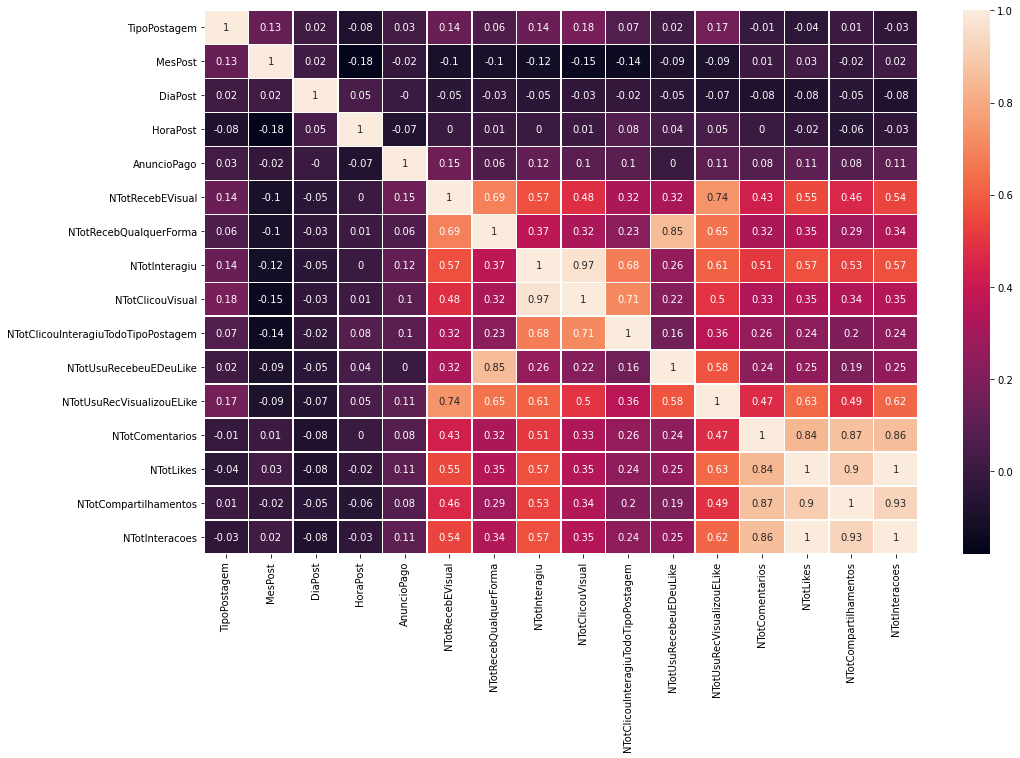

In [26]:
baseDeDados.corr().round(2)
matriz_correlacao = baseDeDados.corr().round(2)

fig, ax = plt.subplots(figsize=(16,10)) 
sb.heatmap(data = matriz_correlacao,  linewidths=.5, annot = True)

Iremos gerar a reta em cima da relação entre as pessoas que recebem uma postagem e visualizam e o número de pessoas que recebem uma postagem, visualizam e curtem estas postagens. Teremos no próximo gráfico a plotagem da relação (ainda sem a reta).

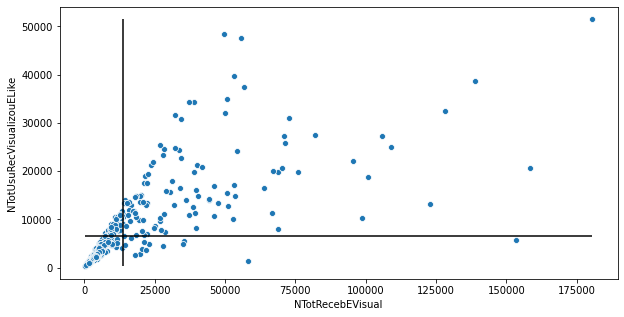

In [27]:
x = baseDeDados['NTotRecebEVisual']
y = baseDeDados['NTotUsuRecVisualizouELike']

ax = sb.scatterplot(x, y)
ax.figure.set_size_inches(10,5)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max())
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max())
ax

Existe um tema muito importante, que é outliers, em outras palavras são valores muito distantes da centralidade dos dados observados. 

Segundo Peter Bruce e Andrew Bruce, <strong>"em linhas gerais, um valor extremo, também chamado de outlier, é aquele que é distante da maioria das outras observações."</strong>

Não vou entrar em detalhes sobre os outliers, mas recomendo fortemente para quem está querendo entender melhor sobre o assunto, da uma olhada em materiais disponíveis na internet, livros e afins. Acabei falando sobre pq vou criar um algoritmo para removê-los, e assim conseguir ter uma reta mais próxima dos valores observados, ou seja, reduzir a margem de erro da previsão.

Esse processo de remoção de outliers é muito importante, o mesmo é realizado normalmente na etapa de pré-processamento dos dados, etapa onde o profissional está adequando os dados para posteriomente extrair resultados.

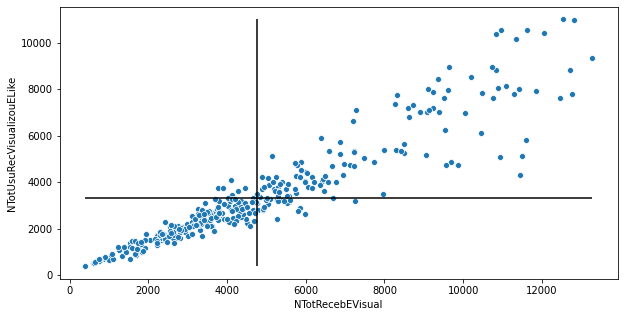

In [28]:
amostra = baseDeDados.query('NTotRecebEVisual < 13500 & NTotUsuRecVisualizouELike < 12000').sample(n = 350, random_state = 101)

x = amostra.NTotRecebEVisual
y = amostra.NTotUsuRecVisualizouELike

ax = sb.scatterplot(x, y)
ax.figure.set_size_inches(10,5)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max())
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max())

A seguir, os gráficos com a reta de regressão para os dois casos.

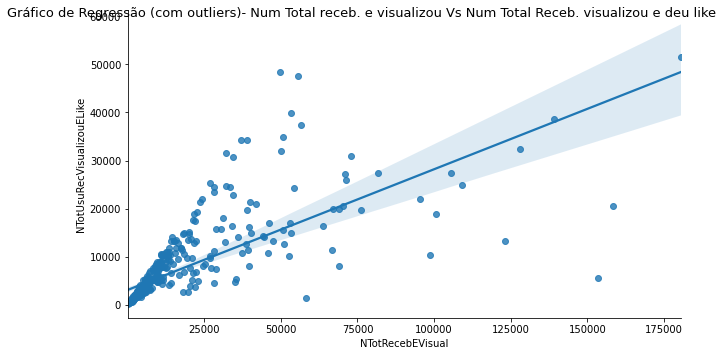

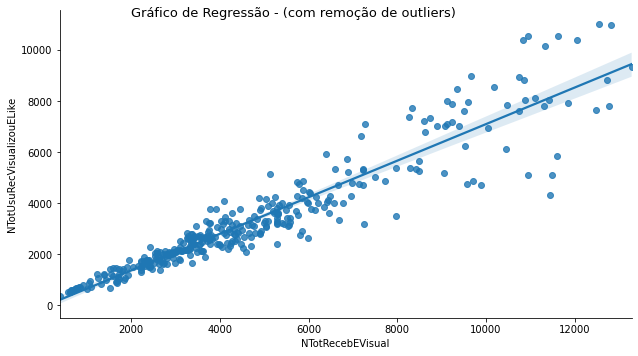

In [29]:
ax = sb.lmplot(x='NTotRecebEVisual', y = 'NTotUsuRecVisualizouELike', data = baseDeDados)
ax1 = sb.lmplot(x='NTotRecebEVisual', y = 'NTotUsuRecVisualizouELike', data = amostra)

ax.fig.suptitle('Gráfico de Regressão (com outliers)- Num Total receb. e visualizou Vs Num Total Receb. visualizou e deu like', fontsize = 13)
ax.fig.set_size_inches(10,5)

ax1.fig.set_size_inches(10,5)
ax1.fig.suptitle('Gráfico de Regressão - (com remoção de outliers)', fontsize = 13)

ax

ax1

#### Regressao Linear multipla

Muito facilmente, encontraremos casos onde a variável dependente tem relação com duas ou mais variáveis independentes em um conjunto de dados. Para esses casos, temos que utilizar a regressão multipla.

Não vou falar sobre os cálculos matemáticos para obter a regressão linear múltipla por que são trabalhosos, além do que este documento ficaria mais extenso como também fugiria completamente o foco, dessa forma, vou concentrar em aplicar algoritmos para exemplificar a utilização deste método para obter previsões.

Utilizaremos outra base de dados sobre o comportamento de tráfego urbano da cidade de São Paulo. Estará disponível no repositório um arquivo .pdf falando mais detalhes. Possui link de acesso no [site](http://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil), porém, farei uma cópia e deixarei disponível aqui no repositório para evitar problemas de acesso.

A base possui atributos numéricos inteiros e cento e trinta e cinco instâncias. Sua classe é definida por um número real (discreto) e será aplicado um algoritmo de regressão linear múltipla para prever os valores. A seguir, a base...

In [30]:
baseDeDados_trafego = pd.read_csv('https://raw.githubusercontent.com/pbitalo/Regressao-Linear/master/bases/Behavior%20of%20the%20urban%20traffic%20of%20the%20city%20of%20Sao%20Paulo%20in%20Brazil.csv', sep=";")
baseDeDados_trafego.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


##### Etapa de pré-processamento dos dados

Neste caso, vou abordar um pouco sobre como foi a etapa de pré-processamento dos dados, pois no caso anterior, não tivemos que fazer grandes alterações na base, pois ela já estava com dados bons o suficiente para serem trabalhos.

Foi necessário converter a primeira coluna representada por um número inteiro que varia de 1 a 27, que faz referência à hora do dia em que foi coletada a informação. A conversão para [dummy variable](https://stattrek.com/multiple-regression/dummy-variables.aspx) foi aplicada para que não haja classificação errônea por parte do algoritmo uma vez que os números mais elevados seriam classificados como mais relevantes do que os de menor valor.

A base escolhida possuí os valores da classe (números reais) separados por vírgula(,), dessa forma foi necessário substituir por ponto (.), pois o python retornou erro no tratamento dessa caso, e por ultimo, existia uma coluna a mais no header, criando uma coluna que não existia no arquivo que possui formato .csv.

Como veremos no algoritmo a seguir, faremos um ultimo tratamento nos dados aplicando a função "executarBackwardElimination", este método conhecido como Backward Elimination(Stevens, J. P. (2002). Applied multivariate statistics for the social sciences (4th ed.). Mahwah, NJ: Lawrence Erlbaum Associates), que em suma objetiva eliminar as colunas que possuí menor correlação entre os dados previsores e previstos. Esta técnica utiliza uma porcentagem de relevância como condição de eliminação, no caso a relevância utilizada foi de até 5% (superior a isso foi descartado). Por fim, foram utilizados 80% dos dados para treinamento e 20% para realizar os testes.

In [31]:
def carregarBase(filename):
    base = pd.read_csv(filename , delimiter=";")
    Previsores = base.iloc[:,:-1].values 
    Classe = base.iloc[:,-1].values 
    return Previsores,Classe

def categorizarVariaveis(Previsores):
    Dummies = pd.get_dummies(Previsores[:,0]) 
    Previsores = Previsores[:,1:] 
    Z = np.append(Dummies, Previsores, axis=1)
    return Z

def divisaoDaBase(Previsores, Classe, testSize):
    PrevisoresTreino, PrevisoresTeste, ClasseTreino, ClasseTeste = train_test_split(Previsores , Classe, test_size = testSize)
    return PrevisoresTreino, PrevisoresTeste, ClasseTreino, ClasseTeste

def executarRegressao(PrevisoresTreino, ClasseTreino, PrevisoresTeste, ClasseTeste):
    regressor = LinearRegression()
    regressor.fit(PrevisoresTreino, ClasseTreino)
    ClassePrev = regressor.predict(PrevisoresTeste)
    margemErro = 0;
    for i in range(0, ClasseTeste.shape[0]):
        print("vReal : %2f" % ClasseTeste[i], " => vPrevisto : %2f" % ClassePrev[i]  , " => Diferença : %2f" %abs(ClassePrev[i] - ClasseTeste[i]))
        margemErro +=  ( (100 * abs(ClassePrev[i] - ClasseTeste[i] ) ) / ClasseTeste[i] )
   
    print('Margem de erro = ',abs(margemErro)/ClasseTeste.shape[0] , '%');
       
        
def executarBackwardElimination(PrevisoresTreino, ClasseTreino, PrevisoresTeste, relevancia):
    PrevisoresTreino = np.insert(PrevisoresTreino, 0, 1, axis=1)
    PrevisoresTeste = np.insert(PrevisoresTeste, 0, 1, axis=1)
    numColunas = len(PrevisoresTreino[0])
    for i in range(0, numColunas):
        regress = sm.OLS(ClasseTreino, PrevisoresTreino.astype(float)).fit()
        vMax = max(regress.pvalues).astype(float)
        if vMax > relevancia:
            for j in range(0, numColunas - i):
                if (regress.pvalues[j].astype(float) == vMax):
                    PrevisoresTreino = np.delete(PrevisoresTreino, j, 1)
                    PrevisoresTeste = np.delete(PrevisoresTeste, j, 1)

    return PrevisoresTreino, PrevisoresTeste
        
def executarRegressaoLinearMultipla(filename):
    Previsores, Classe = carregarBase(filename)
    Previsores = categorizarVariaveis(Previsores)
    PrevisoresTreino, PrevisoresTeste, ClasseTreino, ClasseTeste = divisaoDaBase(Previsores, Classe, 0.2)    
    PrevisoresTreino, PrevisoresTeste = executarBackwardElimination(PrevisoresTreino, ClasseTreino, PrevisoresTeste, 0.05)
    executarRegressao(PrevisoresTreino, ClasseTreino, PrevisoresTeste, ClasseTeste)
    
executarRegressaoLinearMultipla('https://raw.githubusercontent.com/pbitalo/Regressao-Linear/master/bases/Behavior%20of%20the%20urban%20traffic%20of%20the%20city%20of%20Sao%20Paulo%20in%20Brazil.csv')

vReal : 11.800000  => vPrevisto : 17.807424  => Diferença : 6.007424
vReal : 9.300000  => vPrevisto : 8.665217  => Diferença : 0.634783
vReal : 11.200000  => vPrevisto : 16.946657  => Diferença : 5.746657
vReal : 22.100000  => vPrevisto : 17.869959  => Diferença : 4.230041
vReal : 9.200000  => vPrevisto : 8.665217  => Diferença : 0.534783
vReal : 9.000000  => vPrevisto : 8.665217  => Diferença : 0.334783
vReal : 4.700000  => vPrevisto : 8.665217  => Diferença : 3.965217
vReal : 13.700000  => vPrevisto : 14.650016  => Diferença : 0.950016
vReal : 5.000000  => vPrevisto : 5.425000  => Diferença : 0.425000
vReal : 9.400000  => vPrevisto : 16.066667  => Diferença : 6.666667
vReal : 15.300000  => vPrevisto : 16.946657  => Diferença : 1.646657
vReal : 5.100000  => vPrevisto : 8.665217  => Diferença : 3.565217
vReal : 7.400000  => vPrevisto : 8.665217  => Diferença : 1.265217
vReal : 4.800000  => vPrevisto : 8.665217  => Diferença : 3.865217
vReal : 13.100000  => vPrevisto : 16.066667  => Dif

É importante ressaltar que a cada execução do algoritmo, os valores tendem a mudar, pois o train_test_split no momento em que divide a base em teste e treino, realiza essa divisão de forma aleatória

Existem vários outros métodos para previsão de valores, uns mais performáticos que outros, outros mais acertivos, cada qual com suas especificidades.
Outro ponto importante, foi a escolha das bases, escolhi a dedo as duas utilizadas como exemplos, creio que no âmbito profissional as dificuldades seram bem maiores com relação ao tratamento dos dados que na prática corresponde a maior parte do esforço gerado a fim de extrair informações relevantes.